In [5]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'


def read_images(dataset_path):
        imagepaths, labels, quaternions = list(), list(),list()
        label = 0
        # List the directory
        folder = dataset_path.split('/')
        try:  # Python 2
            classes = sorted(os.walk(dataset_path).next()[1])
        except Exception:  # Python 3
            classes = sorted(os.walk(dataset_path).__next__()[1])
        # List each sub-directory (the classes)
        for c in classes:
            c_dir = os.path.join(dataset_path, c)
            try:  # Python 2
                walk = os.walk(c_dir).next()
            except Exception:  # Python 3
                walk = os.walk(c_dir).__next__()
            # Add each image to the training set
            with open(c_dir + '/poses.txt') as f:
                for line in f:
                    if(line[0] != '#'):
                            line = line.split()
                            line = list(map(float, line))
                            quaternions.append(line)
                        

            for sample in range (len(walk[2]) - 1) :
#                     print(os.path.join(c_dir, folder[1]+ str(sample) + '.png'))
#                     image =  cv2.imread(os.path.join(c_dir, folder[1]+ str(sample) + '.png'),cv2.IMREAD_COLOR)
                    image =  mpimg.imread(os.path.join(c_dir, folder[1]+ str(sample) + '.png'),cv2.IMREAD_COLOR)
#                     print(image.shape)
#                     cv2.namedWindow("Image")
#                     cv2.imshow("Image", image)#   
#                     cv2.waitKey (0)
                    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                     cv2.namedWindow("Image")
#                     cv2.imshow("Image", image)#   
#                     cv2.waitKey (0)
                    imagepaths.append(image)
                    labels.append(label)
            label += 1

        return np.array(imagepaths), np.array(labels), np.array(quaternions)

In [2]:
def create_sprite_image(images):
    """Returns a sprite image consisting of images passed as argument. Images should be count x width x height"""
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    
    spriteimage = np.ones((img_h * n_plots ,img_w * n_plots,images.shape[3] ))
  
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                spriteimage[i * img_h:(i + 1) * img_h,
                  j * img_w:(j + 1) * img_w] = this_img
    
    return spriteimage


In [3]:
dataset_path = 'dataset/coarse'
image_coarse, labels_coarse, quaternions_coarse = read_images(dataset_path) 
# print(imagepaths_coarse.shape)
dataset_path = 'dataset/fine'
image_fine, labels_fine, quaternions_fine = read_images(dataset_path) 

dataset_path = 'dataset/real'
image_real, labels_real, quaternions_real = read_images(dataset_path) 
print(image_coarse.shape)
print(image_fine.shape)
print(image_real.shape)




(1335, 64, 64, 3)
(5055, 64, 64, 3)
(5890, 64, 64, 3)


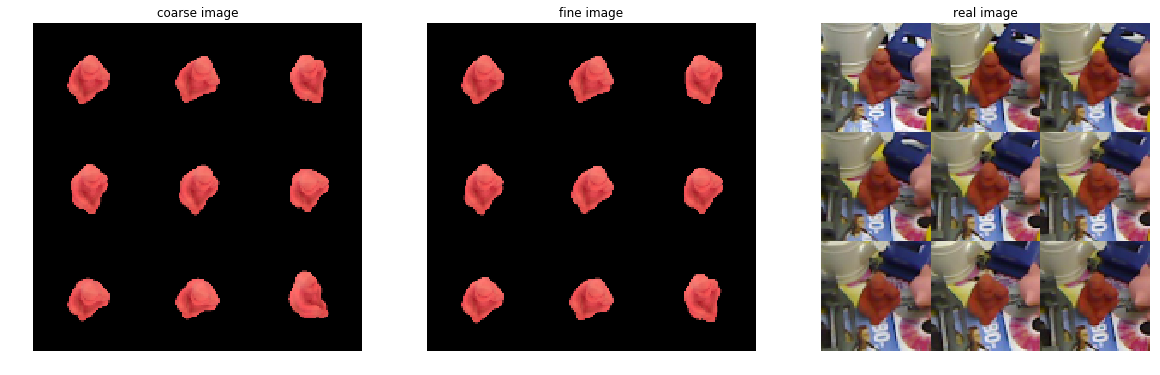

In [9]:

plt.subplot(1,3,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('coarse image')   #第一幅图片标题
plt.imshow(create_sprite_image(image_coarse[1:10]))
plt.axis('off')     #不显示坐标尺寸

plt.subplot(1,3,2)     #第二个子图
plt.title('fine image')   #第二幅图片标题
plt.imshow(create_sprite_image(image_fine[1:10]))
plt.axis('off')     #不显示坐标尺寸

plt.subplot(1,3,3)     #第三个子图
plt.title('real image')   #第三幅图片标题
plt.imshow(create_sprite_image(image_real[1:10]))
plt.axis('off')     #

plt.show()   #显示窗口


In [7]:
import re
with open('dataset/real/training_split.txt') as f:
    line = f.readline()
    line = line.split(', ')
    line = list(map(int, line))
new_list = [x+1178 for x in line]
new_list_1 = [x+1178*2 for x in line]
new_list_2 = [x+1178*3 for x in line]
new_list_3 = [x+1178*4 for x in line]

train_indice = np.array(line + new_list + new_list_1 + new_list_2 + new_list_3)
test_indice = list(range(5890))
test_indice = list(set(test_indice) - set(train_indice))


train_image_real = image_real[train_indice] 
train_labels_real = labels_real[train_indice] 
train_quaternions_real = quaternions_real[train_indice,:] 
print(train_image_real.shape)

test_image_real = image_real[test_indice] 
test_labels_real = labels_real[test_indice] 
test_quaternions_real = quaternions_real[test_indice,:]
print(test_image_real.shape)


Strain_image = np.vstack((train_image_real, image_fine))
Strain_labels =  np.append(train_labels_real , labels_fine)
Strain_quaternions =  np.vstack((train_quaternions_real , quaternions_fine))
print(Strain_image.shape)


(2355, 64, 64, 3)
(3535, 64, 64, 3)
(7410, 64, 64, 3)


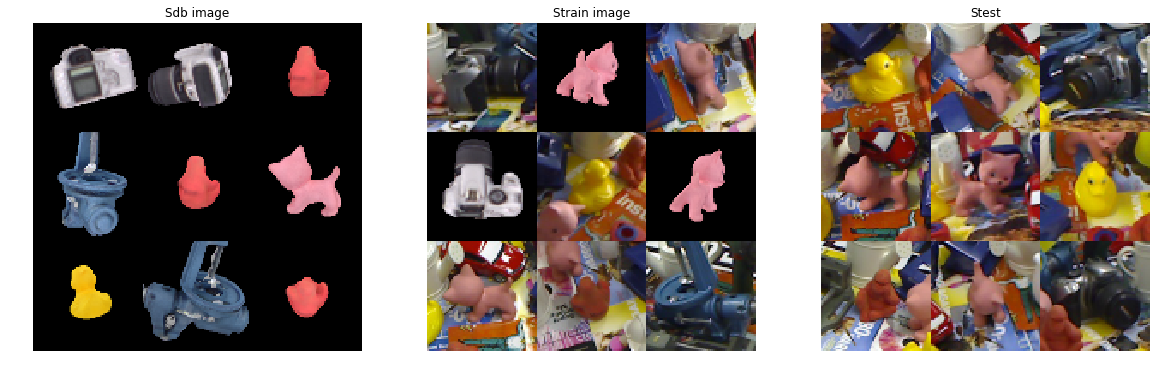

In [8]:
Sdb = np.copy(image_coarse)
np.random.shuffle(Sdb)
plt.subplot(1,3,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('Sdb image')   #第一幅图片标题
plt.imshow(create_sprite_image(Sdb[20:29]))
plt.axis('off')     #不显示坐标尺寸

Strain = np.copy(Strain_image)
np.random.shuffle(Strain)
plt.subplot(1,3,2)     #第二个子图
plt.title('Strain image')   #第二幅图片标题
plt.imshow(create_sprite_image(Strain[2351:2360]))
plt.axis('off')     #不显示坐标尺寸

Stest = np.copy(test_image_real)
np.random.shuffle(Stest)
plt.subplot(1,3,3)     #第三个子图
plt.title('Stest')   #第三幅图片标题
plt.imshow(create_sprite_image(Stest[1:10]))
plt.axis('off')     #

plt.show()   #显示窗口

In [32]:
import math
from numpy import linalg as LA

def batch (Strain_image,Strain_labels,Strain_quaternions,image_coarse, labels_coarse, quaternions_coarse,size):
    triplet = []
    dis = []
    for i in range(size):
        min_indx, min_dis = 0,1
        rand = np.random.randint(0,Strain_image.shape[0])

        indice = np.where (labels_coarse == Strain_labels[rand])

        for j in indice[0] :

            qa = Strain_quaternions[rand] /  LA.norm(Strain_quaternions[rand]) 
            qb = quaternions_coarse[j] / LA.norm(quaternions_coarse[j])
            dot = np.dot(qa,qb.transpose())
            if(abs(dot) > 1):
                dot = 1
            theta = 2 * math.acos(abs(dot))
            if(theta < min_dis):
                min_dis = theta
                min_idx = j
        while(1):
            push_idx = np.random.randint(0,image_coarse.shape[0])
            if (labels_coarse[push_idx] != Strain_labels[rand])  :
                break ;
        
        triplet.append(Strain_image[rand])
        triplet.append(image_coarse[min_idx])
        triplet.append(image_coarse[push_idx])

    return np.array(triplet)

In [33]:

triplet = batch (Strain_image,Strain_labels,Strain_quaternions,image_coarse, labels_coarse, quaternions_coarse,3)
print(triplet.shape)


(9, 64, 64, 3)


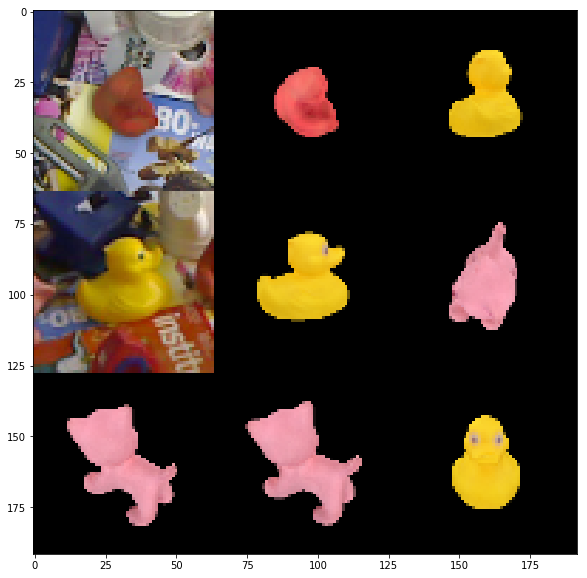

In [34]:
plt.imshow(create_sprite_image(triplet))

In [30]:
SESS = tf.InteractiveSession()
WRITER = tf.summary.FileWriter("TensorBoard/", SESS.graph)

def variable_summaries(var):
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var-mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)
        
def tf_loss_complete(feats, m): 
    #feats should be shape (batch_size * 16)
    with tf.name_scope('loss'):
        batch_size=tf.shape(feats)[0]

        #default m
       

        #||f(x_a)-f(x+)|| and ||f(x_a)-f(x-)||
        diff_pos = tf.subtract(feats[0: batch_size: 3], feats[1: batch_size: 3])
        diff_neg = tf.subtract(feats[0: batch_size: 3], feats[2: batch_size: 3])
#         print(diff_pos.eval())

        

        #||f(x_a)-f(x+)||^2 and ||f(x_a)-f(x-)||^2
        square_pos = tf.square(diff_pos)
        square_neg = tf.square(diff_neg)


        L_pairs = tf.reduce_sum(square_pos)
        tf.summary.scalar('L_pairs', L_pairs)
#         print(L_pairs.eval())
        norm_2_pos=tf.reduce_sum(square_pos, axis=1)
        norm_2_neg=tf.reduce_sum(square_neg, axis=1)

        print(norm_2_pos.eval())

        L_triplets = tf.reduce_sum(tf.maximum(0.0, tf.subtract(1.0, tf.divide(norm_2_neg, tf.add(norm_2_pos, m)))))
#         print(tf.subtract(1.0, tf.divide(norm_2_neg, tf.add(norm_2_pos, m))).eval())
        tf.summary.scalar('L_triplets', L_triplets)
#         print(L_triplets.eval())
    
        L = tf.add(L_triplets, L_pairs)
        
        tf.summary.scalar('loss', L)
        return L

/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [31]:
a=np.array([1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6])
test=[]
for i in range(6):
    test.append(a)
test=tf.convert_to_tensor(np.array(test), dtype=tf.float32)
# print(test.shape)
print(tf_loss_complete(test).eval())
SESS.close()

[0. 0.]
2.0


In [38]:
# Input Layer
INPUT_LAYER = tf.placeholder("float32", [None, 64,64,3])

# Convolutional Layer #1
CONV_1 = tf.layers.conv2d(
    inputs=INPUT_LAYER,
    filters=16,
    kernel_size=[8, 8],
    padding="valid",
    activation=tf.nn.relu)

# Pooling Layer #1
POOL_1 = tf.layers.max_pooling2d(inputs=CONV_1, pool_size=[2, 2], strides=2)
   
# Convolutional Layer #2 
CONV_2 = tf.layers.conv2d(
    inputs=POOL_1,
    filters=7,
    kernel_size=[5, 5],
    padding="valid",
    activation=tf.nn.relu)
    
# Pooling Layer #2
POOL_2 = tf.layers.max_pooling2d(inputs=CONV_2, pool_size=[2, 2], strides=2)

# Flattened Layer
POOL_2_FLAT = tf.reshape(POOL_2, [-1, 12 * 12 * 7])

# First FC layer
FC_1 = tf.layers.dense(inputs=POOL_2_FLAT, units=256, activation=tf.nn.relu)

# Logits Layer
OUTPUT_LAYER = tf.layers.dense(inputs=FC_1, units = 16)

In [39]:
LOSS = tf_loss_complete(OUTPUT_LAYER)

TRAIN_OPTIMIZER = tf.train.AdamOptimizer(1e-4).minimize(LOSS)
SESS.run(tf.global_variables_initializer())


In [66]:
from tensorflow.contrib.tensorboard.plugins import projector

def evaluate():
    # compute features on DB points and test data
    features_db = np.array([SESS.run([OUTPUT_LAYER], feed_dict={INPUT_LAYER: [image]})[0][0] for image in image_coarse])
    features_test = np.array([SESS.run([OUTPUT_LAYER], feed_dict={INPUT_LAYER: [image]})[0][0] for image in test_image_real])
    np.save('feature_db', features_db)
    table = [[np.linalg.norm(features_test[i,:]-features_db[j,:])
              for j in range(np.shape(features_db)[0])]
            for i in range(np.shape(features_test)[0])]
    indices = np.argmin(table, axis=1) # stores index of nearest neighbor
    predicted_classes = [labels_coarse[indices[i]] for i in range(len(indices))]

    degree = [10, 20, 40, 180]
    histogram = [0,0,0,0]
    count = 0
    wrong = 0
    for i in range(test_image_real.shape[0]):
        
        if predicted_classes[i] == test_labels_real[i]:
            count = count + 1
            angle_diff = 360 / np.pi * np.arccos(np.abs(
            np.dot(test_quaternions_real[i], quaternions_coarse[indices[i]])))
            
            for t in range(len(degree)):
                if angle_diff < degree[t]:                    
                    histogram[t] += 1
        else:
            wrong = wrong + 1

#     print(count)
#     print(wrong)
    cm=np.zeros((5,5), dtype=np.int16)
    for i in range(test_image_real.shape[0]):
        cm[test_labels_real[i],predicted_classes[i]]+=1
        
    return histogram, cm, features_test

HIST,CONFUSION_MAT,FEATURES = evaluate()

print(CONFUSION_MAT)

print( HIST)



[[689   0   0  18   0]
 [  0 705   2   0   0]
 [  0   0 706   1   0]
 [  2   0   3 702   0]
 [  5   0   0   0 702]]
[78, 349, 1028, 3504]


In [41]:
from tensorflow.contrib.tensorboard.plugins import projector

LOSS_HIST = [] # loss history
HIST_HIST = [] 
merged = tf.summary.merge_all()
saver = tf.train.Saver()


for epoch in range(500):
    #TODO: load data by batch here
    triplet = batch (Strain_image,Strain_labels,Strain_quaternions,image_coarse, labels_coarse, quaternions_coarse,100)


        
    _, summary, batchloss = SESS.run([TRAIN_OPTIMIZER, merged, LOSS],
                            feed_dict={INPUT_LAYER: triplet})
    #print(summary)
    WRITER.add_summary(summary, epoch)
    if epoch % 10 == 0:
        LOSS_HIST.append(batchloss)
        if epoch % 50 == 0:
            his,CONFUSION_MAT,FEATURES = evaluate()
            HIST_HIST.append(his)
            np.save('feature', FEATURES)
    print("Batches: ", (epoch + 1), "\tloss =", "{:.3f}".format(batchloss), end="\r", flush=True)
    saver.save(SESS, 'TensorBoard/model.ckpt', global_step=epoch)
    


In [63]:
HIST_HIST = HIST_HIST/ test_image_real.shape[0]
print(HIST_HIST)

[[  15.   69.  217.  805.]
 [  37.  210.  632. 2565.]
 [  42.  227.  768. 2955.]
 [  47.  239.  868. 3162.]
 [  53.  251.  828. 3276.]
 [  61.  286.  980. 3367.]
 [  67.  300. 1002. 3404.]
 [  68.  304. 1033. 3442.]
 [  78.  308.  967. 3488.]
 [  84.  308. 1009. 3507.]]


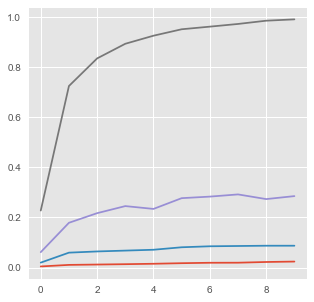

In [91]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
HIST_HIST = np.array(HIST_HIST)
p = np.divide(HIST_HIST,test_image_real.shape[0])
plt.plot(p)
plt.show()

[84, 308, 1009, 3507]
[0.02376238 0.08712871 0.2854314  0.99207921]


Text(0,0.5,'percentage')

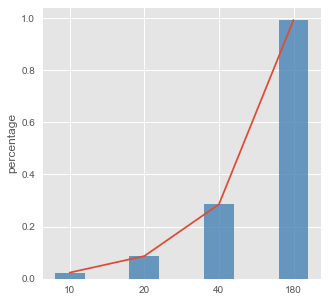

In [92]:
print(his)
p = np.array(his)/test_image_real.shape[0]
print(p)
plt.plot(p)
plt.bar(range(4),p, align = 'center',color='steelblue', alpha = 0.8,width = 0.4)
plt.xticks(range(4),['10','20','40','180'])
plt.ylabel('percentage')

In [70]:
test_image_real.shape[0]

3535

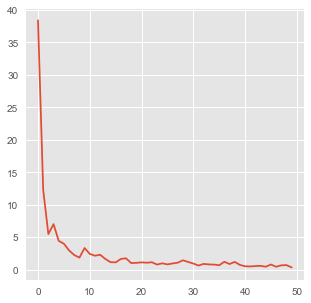

In [93]:
LOSS_HIST = np.array(LOSS_HIST)
plt.plot(LOSS_HIST)
plt.show()

In [94]:
CONFUSION_MAT

array([[689,   0,   0,  18,   0],
       [  0, 705,   2,   0,   0],
       [  0,   0, 706,   1,   0],
       [  2,   0,   3, 702,   0],
       [  5,   0,   0,   0, 702]], dtype=int16)

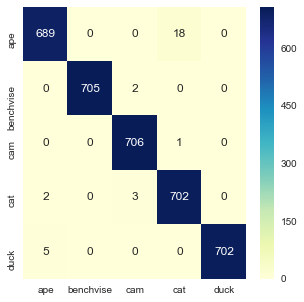

In [95]:
import seaborn as sns; sns.set()
from matplotlib import cm
import pandas as pd
DF = pd.DataFrame(CONFUSION_MAT, index=["ape","benchvise","cam","cat","duck"], columns=["ape","benchvise","cam","cat","duck"])
HEATMAP = sns.heatmap(DF, cmap=cm.YlGnBu, annot=True, fmt="d")

In [21]:
with open(os.path.join(LOG_DIR, 'metadata.tsv'),'w') as f:
    for label in test_labels_real:
        f.write("%d\n" % (label))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


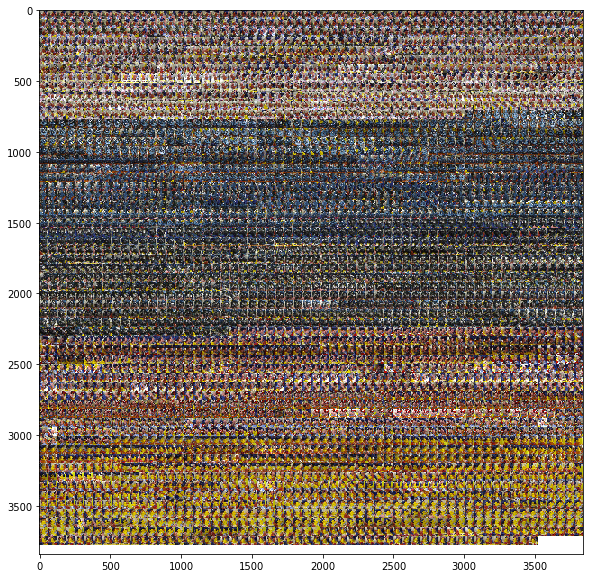

In [41]:

image =create_sprite_image(test_image_real)
plt.imshow(image)
plt.imsave('TensorBoard/metadata.png',image)


In [96]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector

LOG_DIR = 'TensorBoard'
emb_var = tf.Variable(FEATURES, name='test_data_embedding') # DESC_TEST_NP



with tf.Session() as sess:
    saver = tf.train.Saver([emb_var])

    sess.run(emb_var.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'emb.ckpt'))

    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = emb_var.name
    embedding.metadata_path = os.path.join('metadata.tsv')
    embedding.sprite.image_path =  os.path.join('metadata.png') #'mnistdigits.png'
    embedding.sprite.single_image_dim.extend([64,64])

    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)